In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings

with warnings.catch_warnings():
    warnings.simplefilter(action="ignore", category=FutureWarning)

from scipy.stats import ttest_ind, f_oneway
from scipy import stats
from scipy.stats import chi2_contingency

# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

Objective:

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

Read data

In [112]:
data = pd.read_csv("delhivery_data.csv")
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


Data info

In [113]:
print(f"Shape of data {data.shape}")
data.info()

Shape of data (144867, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  fl

source_name ,  destination_name have missing value 

# Train , Test split

In [114]:
train = data[data["data"] == "training"]
test = data[data["data"] == "test"]

print(f" train , test split size: {train.shape[0]} ,{test.shape[0]}")
print(
    f" train , test split %: {train.shape[0]/data.shape[0]} ,{test.shape[0]/data.shape[0]}"
)

 train , test split size: 104858 ,40009
 train , test split %: 0.7238225406752401 ,0.27617745932475996


Remove data column not required for analysis
> Incomplete defination 

In [115]:
train.drop(
    columns=[
        "data",
        "is_cutoff",
        "cutoff_factor",
        "cutoff_timestamp",
        "factor",
        "segment_factor",

    ],
    inplace=True,
)
test.drop(
    columns=[
        "data",
        "is_cutoff",
        "cutoff_factor",
        "cutoff_timestamp",
        "factor",
        "segment_factor",

    ],
    inplace=True,
)

/var/folders/1_/cxb0dkzn58118b6h8kyydz0r0000gn/T/ipykernel_1029/3729246598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(
/var/folders/1_/cxb0dkzn58118b6h8kyydz0r0000gn/T/ipykernel_1029/3729246598.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(


In [116]:
print(
    f" no missing data for  column source_name train set : {train['source_name'].isna().sum()}  test set : {test['source_name'].isna().sum()} "
)

print(
    f" no missing data for  column destination_name train set : {train['destination_name'].isna().sum()}  test set : {test['destination_name'].isna().sum()} "
)

 no missing data for  column source_name train set : 129  test set : 164 
 no missing data for  column destination_name train set : 100  test set : 161 


# Imputation

In [117]:
def mode(x):
    counter = {}

    for ele in x:
        if ele is not np.nan:
            if ele in counter:
                counter[ele] += 1
            else:
                counter[ele] = 1

    if len(counter) >= 1:
        return list(sorted(counter.items(), key=lambda x: x[1], reverse=True))[0][0]
    else:
        return None

Impute source name using destination_center 

1. for train data  all non null souce name -- group by destination_center and take mode of source_name ex :'IND000000AAL': 'Pune_Tathawde_H (Maharashtra)'
2. Get global mode of souce name in case destination_center is not found in test or missing data rows 

In [118]:
imputer_source_name = (
    train[~train["source_name"].isna()]
    .groupby("destination_center")["source_name"]
    .apply(mode)
    .to_dict()
)
global_source_name_mode = (
    train[~train["source_name"].isna()]["source_name"]
    .value_counts()
    .head(1)
    .index.values[0]
)

` Train/Test imputation of source name `

In [119]:
# train source_name imputation
missing_destination_center_proxy = (
    train[train["source_name"].isna()]
    .groupby("destination_center")["source_name"]
    .apply(list)
    .index
)
# imputation
for proxy in missing_destination_center_proxy:
    # if proxy available fill with that
    if proxy in imputer_source_name:
        train.loc[
            (train["source_name"].isna()) & (train["destination_center"] == proxy),
            "source_name",
        ] = imputer_source_name[proxy]
    else:  # fill with global mode
        train.loc[
            (train["source_name"].isna()) & (train["destination_center"] == proxy),
            "source_name",
        ] = global_source_name_mode


# test source_name imputation
missing_destination_center_proxy = (
    test[test["source_name"].isna()]
    .groupby("destination_center")["source_name"]
    .apply(list)
    .index
)
for proxy in missing_destination_center_proxy:
    # if proxy available fill with that
    if proxy in imputer_source_name:
        test.loc[
            (test["source_name"].isna()) & (test["destination_center"] == proxy),
            "source_name",
        ] = imputer_source_name[proxy]
    else:  # fill with global mode
        test.loc[
            (test["source_name"].isna()) & (test["destination_center"] == proxy),
            "source_name",
        ] = global_source_name_mode


print(
    f" no missing data  after imputation train set : {train['source_name'].isna().sum()}  test set : {test['source_name'].isna().sum()} "
)

 no missing data  after imputation train set : 0  test set : 0 


` Train/Test imputation of destination_name `

Impute destination_name using destination_center 

1. for train data  all non null destination_name -- group by destination_center and take mode of source_name ex :'IND000000AAL': Pune_PC (Maharashtra)
2. Get global mode of destination_name in case destination_center is not found in test or missing data rows 

In [120]:
imputer_destination_name = (
    train[~train["destination_name"].isna()]
    .groupby("destination_center")["destination_name"]
    .apply(mode)
    .to_dict()
)
global_destination_name_mode = (
    train[~train["destination_name"].isna()]["destination_name"]
    .value_counts()
    .head(1)
    .index.values[0]
)

In [121]:
missing_destination_center_proxy = (
    train[train["destination_name"].isna()]
    .groupby("destination_center")["destination_name"]
    .apply(list)
    .index
)
for proxy in missing_destination_center_proxy:
    if proxy in imputer_destination_name:
        train.loc[
            (train["destination_name"].isna()) & (train["destination_center"] == proxy),
            "destination_name",
        ] = imputer_destination_name[proxy]
    else:
        train.loc[
            (train["destination_name"].isna()) & (train["destination_center"] == proxy),
            "destination_name",
        ] = global_destination_name_mode


missing_destination_center_proxy = (
    test[test["destination_name"].isna()]
    .groupby("destination_center")["destination_name"]
    .apply(list)
    .index
)
for proxy in missing_destination_center_proxy:
    if proxy in imputer_destination_name:
        test.loc[
            (test["destination_name"].isna()) & (test["destination_center"] == proxy),
            "destination_name",
        ] = imputer_destination_name[proxy]
    else:
        test.loc[
            (test["destination_name"].isna()) & (test["destination_center"] == proxy),
            "destination_name",
        ] = global_destination_name_mode


print(
    f" no missing data  after imputation train set : {train['destination_name'].isna().sum()}  test set : {test['destination_name'].isna().sum()} "
)

 no missing data  after imputation train set : 0  test set : 0 


In [122]:
print("Number of missing value in train/ test")
print("train", train.isna().sum().sum())
print("test", test.isna().sum().sum())

Number of missing value in train/ test
train 0
test 0


# Data standardization

standardization destination_name

In [123]:
def split_desti(x):
    chucks = x.split(" ")
    city_place = chucks[0].split("_")
    city = city_place[0]
    place_code = "_".join(city_place[1:])
    state = chucks[1].replace("(", "").replace(")", "")
    return [city, place_code, state]

In [124]:
train[
    ["destination_name_city", "destination_name_place_code", "destination_name_state"]
] = (train["destination_name"].apply(split_desti).to_list())
test[
    ["destination_name_city", "destination_name_place_code", "destination_name_state"]
] = (test["destination_name"].apply(split_desti).to_list())

/var/folders/1_/cxb0dkzn58118b6h8kyydz0r0000gn/T/ipykernel_1029/3896505685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[
/var/folders/1_/cxb0dkzn58118b6h8kyydz0r0000gn/T/ipykernel_1029/3896505685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[
/var/folders/1_/cxb0dkzn58118b6h8kyydz0r0000gn/T/ipykernel_1029/3896505685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

standardization source_name

In [125]:
train[["source_name_city", "source_name_place_code", "source_name_state"]] = (
    train["source_name"].apply(split_desti).to_list()
)
test[["source_name_city", "source_name_place_code", "source_name_state"]] = (
    test["source_name"].apply(split_desti).to_list()
)

/var/folders/1_/cxb0dkzn58118b6h8kyydz0r0000gn/T/ipykernel_1029/2294081347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[["source_name_city", "source_name_place_code", "source_name_state"]] = (
/var/folders/1_/cxb0dkzn58118b6h8kyydz0r0000gn/T/ipykernel_1029/2294081347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[["source_name_city", "source_name_place_code", "source_name_state"]] = (
/var/folders/1_/cxb0dkzn58118b6h8kyydz0r0000gn/T/ipykernel_1029/2294081347.py:1: SettingWithCopyWarn

` transforming trip_creation_time `
* features [day , year , month  , dayname ]

In [126]:
train["trip_creation_time"] = pd.to_datetime(train["trip_creation_time"])
test["trip_creation_time"] = pd.to_datetime(test["trip_creation_time"])
train["trip_creation_time_day"] = train["trip_creation_time"].dt.day
train["trip_creation_time_year"] = train["trip_creation_time"].dt.year
train["trip_creation_time_month"] = train["trip_creation_time"].dt.month
train["trip_creation_time_dayname"] = train["trip_creation_time"].dt.day_name()
test["trip_creation_time_day"] = test["trip_creation_time"].dt.day
test["trip_creation_time_year"] = test["trip_creation_time"].dt.year
test["trip_creation_time_month"] = test["trip_creation_time"].dt.month
test["trip_creation_time_dayname"] = test["trip_creation_time"].dt.day_name()

/var/folders/1_/cxb0dkzn58118b6h8kyydz0r0000gn/T/ipykernel_1029/2074765259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["trip_creation_time"] = pd.to_datetime(train["trip_creation_time"])
/var/folders/1_/cxb0dkzn58118b6h8kyydz0r0000gn/T/ipykernel_1029/2074765259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["trip_creation_time"] = pd.to_datetime(test["trip_creation_time"])
/var/folders/1_/cxb0dkzn58118b6h8kyydz0r0000gn/T/ipykernel_1029/2074765259.py:3: SettingWithCopyWarning: 
A valu

In [127]:
print(
    f" no missing data  after imputation train set : {train.isna().sum().sum()}  test set : {test.isna().sum().sum()} "
)

 no missing data  after imputation train set : 0  test set : 0 


* Calculate the time taken between od_start_time and od_end_time and keep it as a feature
* od_start_time – Trip start time # transforming to datetime 
* od_end_time – Trip end time  # transforming to datetime 
* calulate delta between od_end_time and od_start_time

In [128]:
train["od_start_time"] = pd.to_datetime(train["od_start_time"])
test["od_start_time"] = pd.to_datetime(test["od_start_time"])
train["od_end_time"] = pd.to_datetime(train["od_end_time"])
test["od_end_time"] = pd.to_datetime(test["od_end_time"])

# datedelta to day
train["trip_time_days"] = (
    (train["od_end_time"] - train["od_start_time"]) / np.timedelta64(1, "h")
) / 24
test["trip_time_days"] = (
    (test["od_end_time"] - test["od_start_time"]) / np.timedelta64(1, "h")
) / 24

/var/folders/1_/cxb0dkzn58118b6h8kyydz0r0000gn/T/ipykernel_1029/1339255812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["od_start_time"] = pd.to_datetime(train["od_start_time"])
/var/folders/1_/cxb0dkzn58118b6h8kyydz0r0000gn/T/ipykernel_1029/1339255812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["od_start_time"] = pd.to_datetime(test["od_start_time"])
/var/folders/1_/cxb0dkzn58118b6h8kyydz0r0000gn/T/ipykernel_1029/1339255812.py:3: SettingWithCopyWarning: 
A value is trying to be se

`  Removing columns after extracting features`
* ['trip_creation_time','source_name' ,  'destination_name' ,'route_schedule_uuid' ,'od_end_time' ,'od_start_time']


In [129]:
train.drop(
    columns=[
        "trip_creation_time",
        "source_name",
        "destination_name",
        "route_schedule_uuid",
        "od_end_time",
        "od_start_time",
    ],
    inplace=True,
)
test.drop(
    columns=[
        "trip_creation_time",
        "source_name",
        "destination_name",
        "route_schedule_uuid",
        "od_end_time",
        "od_start_time",
    ],
    inplace=True,
)

/var/folders/1_/cxb0dkzn58118b6h8kyydz0r0000gn/T/ipykernel_1029/3881797418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(
/var/folders/1_/cxb0dkzn58118b6h8kyydz0r0000gn/T/ipykernel_1029/3881797418.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(


# Aggregations by trip_uuid
1. Numerical feature is agg by mean 
2. Categorical/date feature is agg by mode 

In [130]:
import statistics


def calculate_mode(data):
    mode_result = statistics.mode(data)
    return mode_result


aggregation_rules = {
    np.mean: [
        "start_scan_to_end_scan",
        "actual_distance_to_destination",
        "actual_time",
        "osrm_time",
        "osrm_distance",
        "segment_actual_time",
        "segment_osrm_time",
        "segment_osrm_distance",
        "trip_time_days",
    ],
    calculate_mode: [
        "route_type",
        "source_center",
        "destination_center",
        "destination_name_city",
        "destination_name_place_code",
        "destination_name_state",
        "trip_creation_time_year",
        "source_name_city",
        "destination_name_place_code",
        "source_name_state",
        "trip_creation_time_day",
        "trip_creation_time_month",
        "trip_creation_time_dayname",
    ],
}


mapping_agg = {}
for key in aggregation_rules:
    for col in aggregation_rules[key]:
        mapping_agg[col] = [key]

In [131]:
train_agg = train.groupby("trip_uuid").agg(mapping_agg).reset_index()
train_agg.columns = train_agg.columns.droplevel(level=1)
test_agg = test.groupby("trip_uuid").agg(mapping_agg).reset_index()
test_agg.columns = test_agg.columns.droplevel(level=1)

` Univariate analysis `

In [132]:
for col in aggregation_rules[calculate_mode]:
    print("~" * 75)
    print(
        f" Train set No of unique  category per column : `{col}` :{train_agg[col].nunique()} "
    )
    print(
        f" Test set No of unique  category per column : `{col}` :{test_agg[col].nunique()} "
    )

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 Train set No of unique  category per column : `route_type` :2 
 Test set No of unique  category per column : `route_type` :2 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 Train set No of unique  category per column : `source_center` :866 
 Test set No of unique  category per column : `source_center` :626 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 Train set No of unique  category per column : `destination_center` :924 
 Test set No of unique  category per column : `destination_center` :647 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 Train set No of unique  category per column : `destination_name_city` :744 
 Test set No of unique  category per column : `destination_name_city` :509 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 Train set No of unique  category per column : `destinat

* Distribution of train and test set is different for numerous category 
* ` trip_creation_time_month  has just months [9] is Train set but test set [9 ,10] `
* only route type and trip_creation_time_year have all categories that are present in both train and test 

In [133]:
# drop trip_uuid  not required now
train.drop(
    columns=[

        'trip_uuid'
    ],
    inplace=True,
)
test.drop(
    columns=[

'trip_uuid'
    ],
    inplace=True,
)

/var/folders/1_/cxb0dkzn58118b6h8kyydz0r0000gn/T/ipykernel_1029/3206134199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(
/var/folders/1_/cxb0dkzn58118b6h8kyydz0r0000gn/T/ipykernel_1029/3206134199.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(


`Correlation`

* start_scan_to_end_scan – Time taken to deliver from source to destination (time)
* actual_distance_to_destination – Distance in Kms between source and destination warehouse (dist)
* actual_time – Actual time taken to complete the delivery (Cumulative) (time)
* osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative) (time)
* osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative) (dist)
* segment_actual_time – This is a segment time. Time taken by the subset of the package delivery(time)
* segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery(time)
* segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery(dist)


<Axes: >

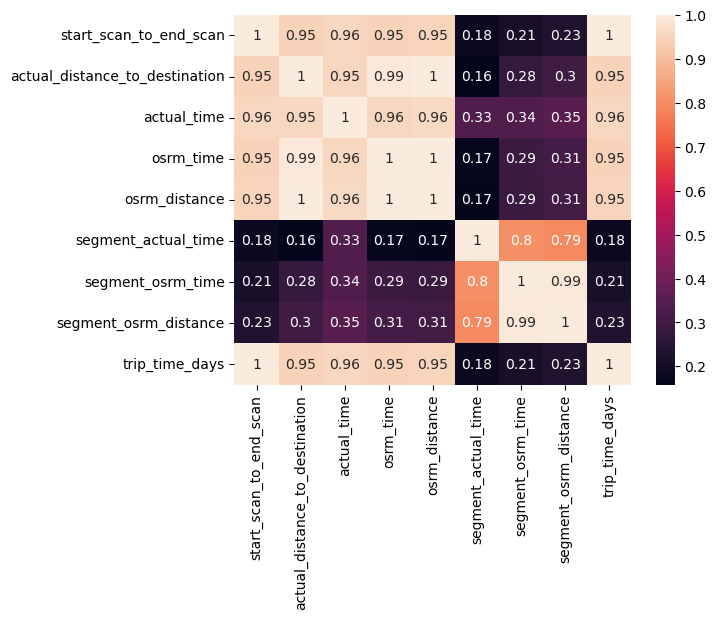

In [134]:
temp = train_agg[
    [
        "start_scan_to_end_scan",
        "actual_distance_to_destination",
        "actual_time",
        "osrm_time",
        "osrm_distance",
        "segment_actual_time",
        "segment_osrm_time",
        "segment_osrm_distance",
        'trip_time_days'
    ]
].corr()
sns.heatmap(temp, annot=True)

* start_scan_to_end_scan is highly corr to [ 'actual_distance_to_destination','actual_time','osrm_time','osrm_distance'] -- `which is good we are delivering packages on almost on time thats why osrm_time and start_scan_to_end_scan  are highly correlated, start_scan_to_end_scan and osrm_distance is correlated because as time incease distance will increase`




` Hypothesis testing `

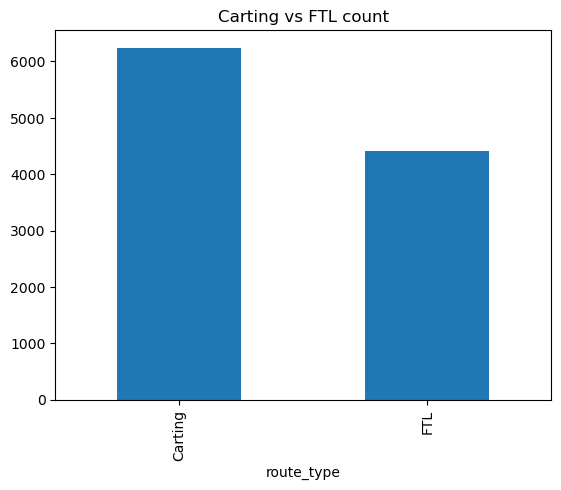

In [135]:
train_agg["route_type"].value_counts().plot(kind="bar")
plt.title("Carting vs FTL count")
plt.show()

` start_scan_to_end_scan – Time taken to deliver from source to destination `


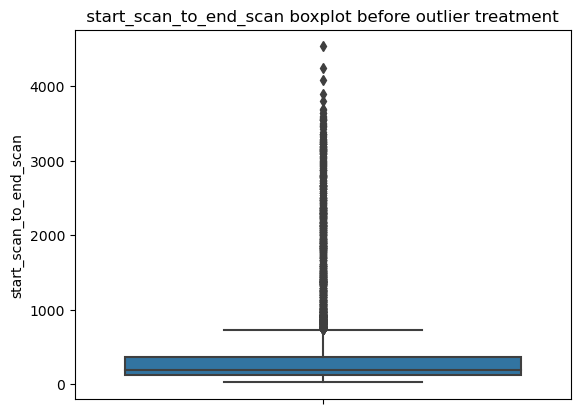

In [136]:
sns.boxplot(data=train_agg, y="start_scan_to_end_scan")
plt.title(" start_scan_to_end_scan boxplot before outlier treatment ")
plt.show()

` Treating outlier `

In [137]:
def treat_outliers_iqr_pandas(
    df, multiplier=1.5, treat="train", lower_bound=None, upper_bound=None, median=None
):
    """
    Treat outliers in a DataFrame using the IQR (Interquartile Range).
    """

    if treat == "train":

        # Calculate the IQR (Interquartile Range)
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)
        iqr = q3 - q1

        # Define lower and upper bounds for outliers
        lower_bound = q1 - multiplier * iqr
        upper_bound = q3 + multiplier * iqr

        # Identify outliers
        outliers_mask = (df < lower_bound) | (df > upper_bound)
        median = df.median()
        df[outliers_mask] = median
        return df, lower_bound, upper_bound, median
    if treat == "test":
        outliers_mask = (df < lower_bound) | (df > upper_bound)
        df[outliers_mask] = median
        return df

    return None


temp = train_agg["start_scan_to_end_scan"].copy(deep=True)

# Treat outliers using the treat_outliers_iqr_pandas function
train_agg["start_scan_to_end_scan"], lower_bound, upper_bound, median = (
    treat_outliers_iqr_pandas(
        train_agg["start_scan_to_end_scan"], multiplier=1.5, treat="train"
    )
)

/var/folders/1_/cxb0dkzn58118b6h8kyydz0r0000gn/T/ipykernel_1029/205074276.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[outliers_mask] = median


###  Treating with outlier introduces new outlier above 75 percentile -- we are doing multiple agg and outlier treatment will surely effect experiment conclusion thus I wont be treating before conducting experiment. 
` Reseting start_scan_to_end_scan to orignal state `

In [138]:
train_agg["start_scan_to_end_scan"] = temp

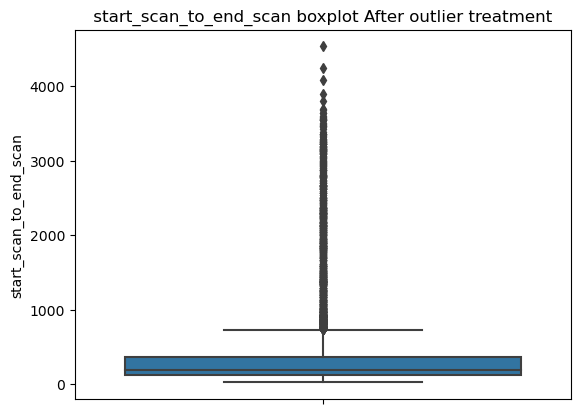

In [139]:
sns.boxplot(data=train_agg, y="start_scan_to_end_scan")
plt.title(" start_scan_to_end_scan boxplot After outlier treatment ")
plt.show()

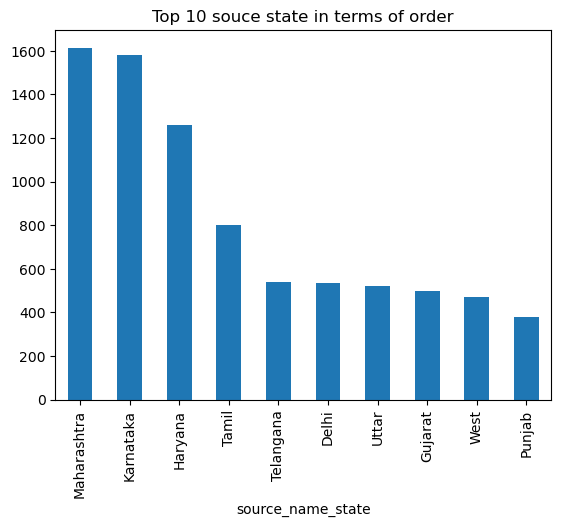

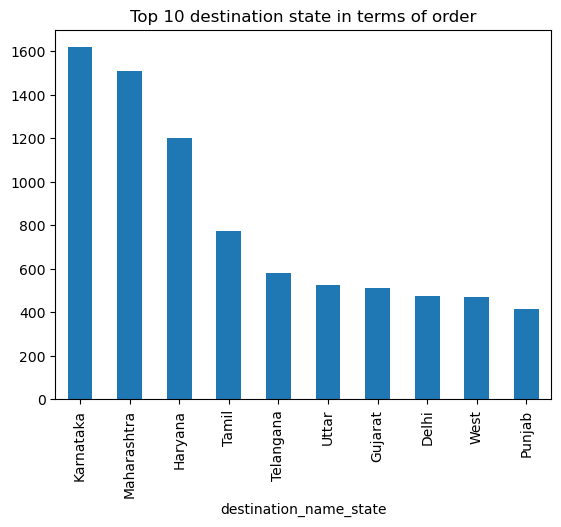

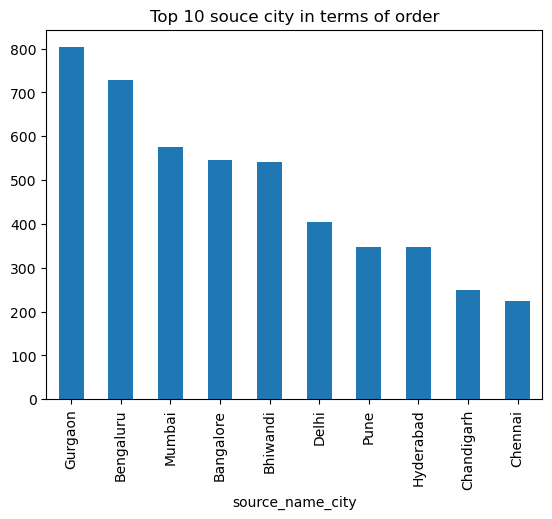

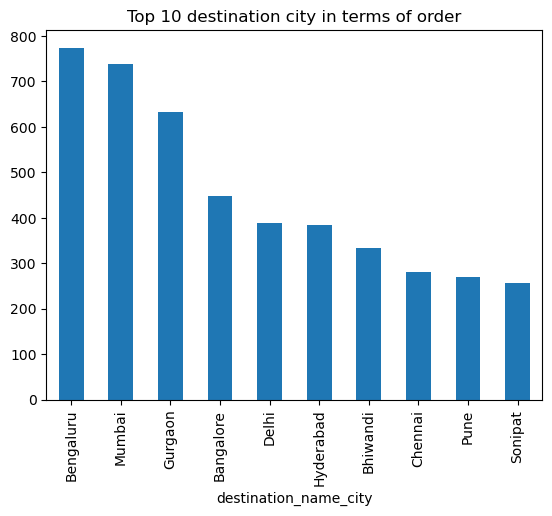

In [140]:
train_agg["source_name_state"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 souce state in terms of order")
plt.show()
train_agg["destination_name_state"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 destination state in terms of order")
plt.show()

train_agg["source_name_city"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 souce city in terms of order")
plt.show()
train_agg["destination_name_city"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 destination city in terms of order")
plt.show()

* source_name_state Maharastra has most number of shipment created 
* destination state Karnatake has most number of shipment to -- busy state
* source_name_city Gurgaun has most number of shipment created 
* destination city Benguluru has most number of shipment to -- busy city

source_name_state  destination_name_state
Karnataka          Karnataka                 1357
Maharashtra        Maharashtra               1156
Tamil              Tamil                      742
Haryana            Haryana                    605
Telangana          Telangana                  467
Name: count, dtype: int64

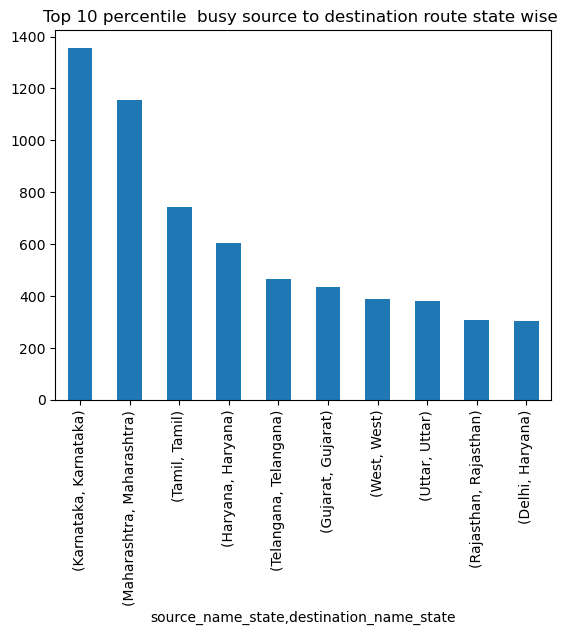

source_name_state  destination_name_city
Karnataka          Bengaluru                716
Maharashtra        Mumbai                   582
Tamil              Chennai                  282
Telangana          Hyderabad                276
Karnataka          Bangalore                276
Name: count, dtype: int64

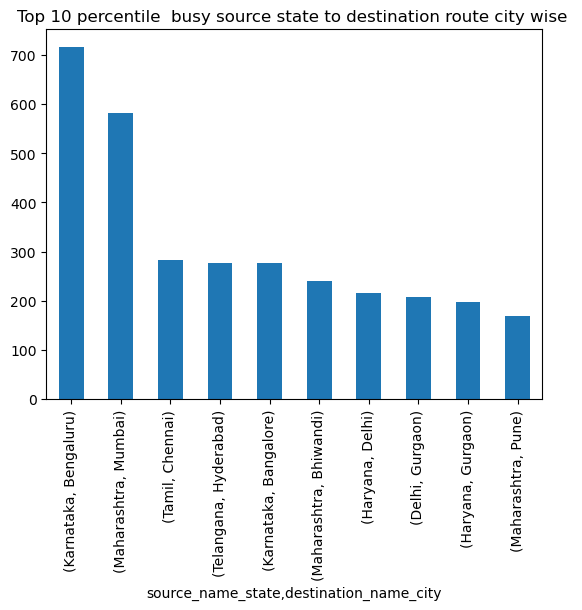

In [141]:
source_dest_tranction = (
    train_agg.groupby(["source_name_state", "destination_name_state"])[
        "destination_name_state"
    ]
    .value_counts()
    .sort_values(ascending=False)
)
b_t, t_t = source_dest_tranction.quantile([0.1, 0.9])

display(source_dest_tranction[source_dest_tranction > t_t].head(5))


source_dest_tranction.head(10).plot(kind="bar")
plt.title("Top 10 percentile  busy source to destination route state wise ")
plt.show()


source_dest_tranction = (
    train_agg.groupby(["source_name_state", "destination_name_city"])[
        "destination_name_city"
    ]
    .value_counts()
    .sort_values(ascending=False)
)
b_t, t_t = source_dest_tranction.quantile([0.1, 0.9])

display(source_dest_tranction[source_dest_tranction >= t_t].head(5))


source_dest_tranction.head(10).plot(kind="bar")
plt.title("Top 10 percentile  busy source state to destination route city wise ")
plt.show()

* busiest (source state and destination state) combination is Karnataka -> Karnataka    and  Maharashtra  -> Maharashtra 
* busiest (source state and destination city) combination is Karnataka -> Bengaluru    and  Maharashtra  -> Mumbai   -- same state 

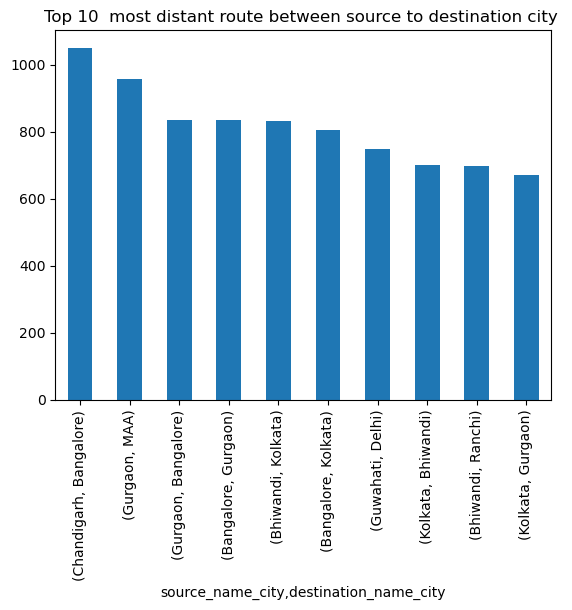

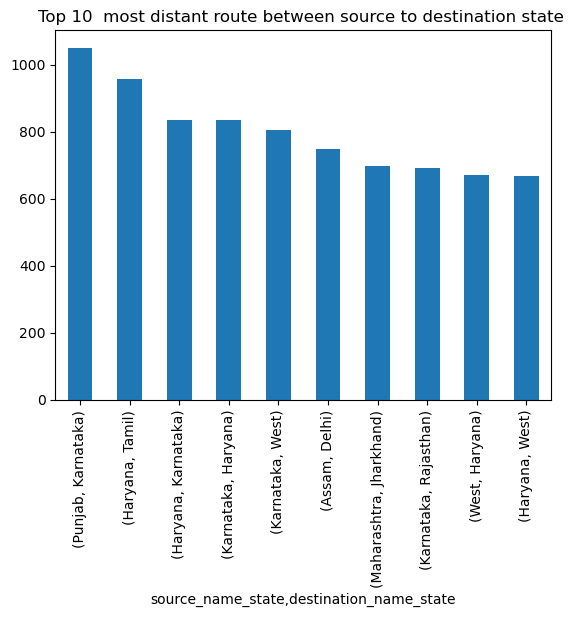

In [142]:
train_agg.groupby(["source_name_city", "destination_name_city"])[
    "actual_distance_to_destination"
].mean().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Top 10  most distant route between source to destination city ")
plt.show()

train_agg.groupby(["source_name_state", "destination_name_state"])[
    "actual_distance_to_destination"
].mean().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Top 10  most distant route between source to destination state ")
plt.show()

* most distant (source city -- destination city )  is Chandigarh-> bangalore 
* most distant (source state -- destination state )  is Punjab-> Karnataka 

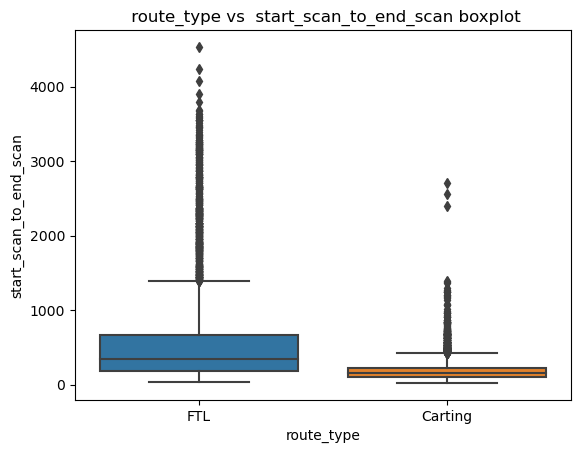

In [143]:
sns.boxplot(data=train_agg, x="route_type", y="start_scan_to_end_scan")
plt.title(" route_type vs  start_scan_to_end_scan boxplot")
plt.show()

* ` Is Time taken to deliver from source to destination  is same for different route_type ?`
* h0 :Time taken to deliver from source to destination  is same for different route_type
* h1 :Time taken to deliver from source to destination  is different for different route_type
* alpha =0.05

In [144]:
start_scan_to_end_scan_carting = train_agg[train_agg["route_type"] == "Carting"][
    "start_scan_to_end_scan"
]
start_scan_to_end_scan_flt = train_agg[train_agg["route_type"] == "FTL"][
    "start_scan_to_end_scan"
]

alpha = 0.05
tstats, pval = ttest_ind(start_scan_to_end_scan_carting, start_scan_to_end_scan_flt)

if pval < alpha:
    print(
        "reject ho :Time taken to deliver from source to destination  is different for different route_type"
    )
else:
    print(
        "Time taken to deliver from source to destination  is same for different route_type"
    )

reject ho :Time taken to deliver from source to destination  is different for different route_type


## Mapping state to zone 

In [145]:
def state_to_zone_mapping(state):
    north_states = [
        "delhi",
        "haryana",
        "punjab",
        "chandigarh",
        "uttarakhand",
        "himachal",
        "jammu",
    ]
    south_states = ["karnataka", "tamil", "telangana", "andhra", "kerala"]
    east_states = [
        "west",
        "assam",
        "jharkhand",
        "orissa",
        "bihar",
        "tripura",
        "mizoram",
        "nagaland",
    ]
    west_states = [
        "madhya",
        "gujarat",
        "maharashtra",
        "goa",
        "rajasthan",
        "uttar",
        "chhattisgarh",
    ]

    if state.lower() in north_states:
        zone_mapping = "north"
    elif state.lower() in south_states:
        zone_mapping = "south"
    elif state.lower() in east_states:
        zone_mapping = "east"
    elif state.lower() in west_states:
        zone_mapping = "west"
    else:
        zone_mapping = "unknown zone"

    return zone_mapping


train_agg["source_name_state_zone"] = train_agg["source_name_state"].apply(
    state_to_zone_mapping
)
test_agg["source_name_state_zone"] = test_agg["source_name_state"].apply(
    state_to_zone_mapping
)
train_agg["source_name_state_zone"] = train_agg["source_name_state_zone"].str.lower()
test_agg["source_name_state_zone"] = test_agg["source_name_state_zone"].str.lower()

In [146]:
print(" Distribution of train/test statezone distribution")
display(train_agg["source_name_state_zone"].value_counts())
display(test_agg["source_name_state_zone"].value_counts())

 Distribution of train/test statezone distribution


source_name_state_zone
south           3459
west            3251
north           2416
east            1150
unknown zone     378
Name: count, dtype: int64

source_name_state_zone
west            1407
south           1287
north            841
east             429
unknown zone     199
Name: count, dtype: int64

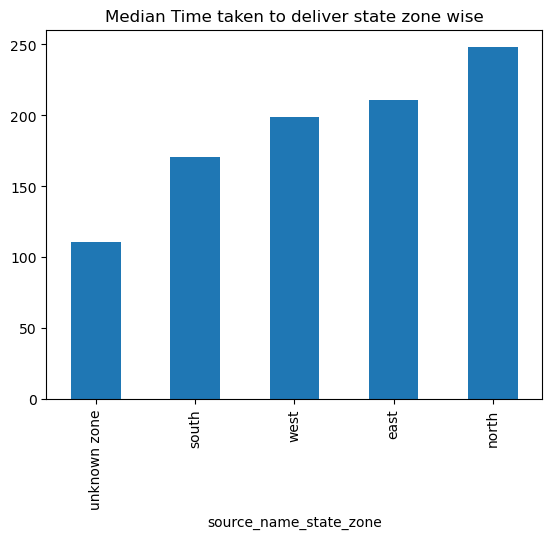

In [147]:
train_agg.groupby("source_name_state_zone")[
    "start_scan_to_end_scan"
].median().sort_values().plot(kind="bar")
plt.title("Median Time taken to deliver state zone wise")
plt.show()

* Northern state  take highest time to deliver goods -- poor infra/ logistic 
* Southern state  take least time to deliver goods 


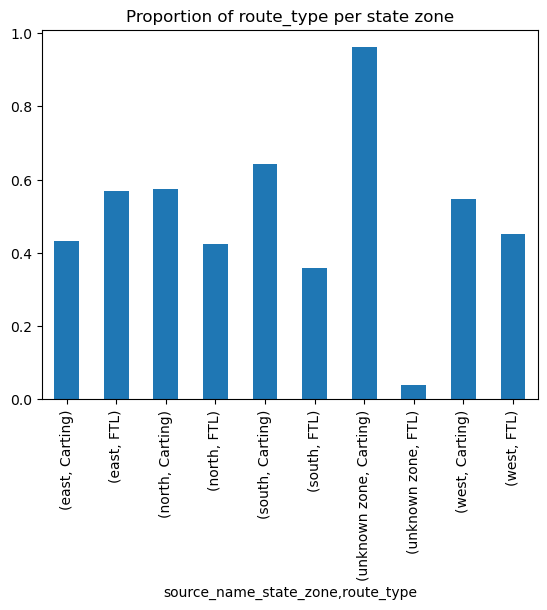

In [148]:
(
    train_agg.groupby(["source_name_state_zone", "route_type"])["route_type"].count()
    / train_agg.groupby(["source_name_state_zone", "route_type"])["route_type"]
    .count()
    .groupby("source_name_state_zone")
    .sum()
).sort_index().plot(kind="bar")

plt.title("Proportion of route_type per state zone")
plt.show()

chi_square test :

* ho : There is no relationship between state_zone and route_type
* ha : There is relationship between state_zone and route_type

In [149]:
tab = pd.crosstab(train_agg["source_name_state_zone"], train_agg["route_type"])
display(tab)
c, pval, dof, expected = chi2_contingency(tab)

if pval < alpha:
    print("reject ho :There is relationship between state_zone and route_type")
else:
    print("There is no relationship between state_zone and route_type ")

route_type,Carting,FTL
source_name_state_zone,,
east,496,654
north,1389,1027
south,2218,1241
unknown zone,363,15
west,1779,1472


reject ho :There is relationship between state_zone and route_type


* East zone FLT is prefered choice to transport | long haul 
* North zone Carting is prefered choice to transport | urban area small vechile would be prefered
* South zone Carting is prefered choice to transport | urban area small vechile would be prefered
* West zone Carting is prefered choice to transport | urban area small vechile would be prefered
* For east zone FTL is more prefered mode of transport 

chi_square test :

* ho : There is no relationship between state and route_type
* ha : There is relationship between state and route_type

In [150]:
tab = pd.crosstab(train_agg["source_name_state"], train_agg["route_type"])

# each option should have atleast 10 entries
tab = tab[tab.min(axis=1) > 10]
display(tab)
c, pval, dof, expected = chi2_contingency(tab)

if pval < alpha:
    print("reject ho :There is relationship between state and route_type")
else:
    print("There is no relationship between state and route_type ")

route_type,Carting,FTL
source_name_state,,
Andhra,72,254
Assam,92,105
Bihar,15,264
Chhattisgarh,16,15
Delhi,470,65
Goa,19,24
Gujarat,251,246
Haryana,778,481
Jharkhand,40,73


reject ho :There is relationship between state and route_type


* States like Andhra,Assam,Bihar,Goa,Jharkhand,Madhya,Orissa,Punjab,Rajasthan prefered mode of transport in FLT
* States like Chhattisgarh,Delhi,Gujarat,Haryana,Karnataka,Kerala,Maharashtra,Tamil,Telangana,Uttar,West prefered mode of transport is Carting

chi_square test :

* ho : There is no relationship between city and route_type
* ha : There is relationship between city and route_type

In [151]:
tab = pd.crosstab(train_agg["source_name_city"], train_agg["route_type"])

# each option should have atleast 10 entries
tab = tab[tab.min(axis=1) > 10]
display(tab)
c, pval, dof, expected = chi2_contingency(tab)

if pval < alpha:
    print("reject ho :There is relationship between city and route_type")
else:
    print("There is no relationship between city and route_type ")

route_type,Carting,FTL
source_name_city,,
Ahmedabad,91,78
Allahabad,16,13
Aluva,22,29
Aurangabad,20,22
Bangalore,377,169
Bengaluru,701,28
Bhiwandi,313,228
Bhopal,40,31
Chandigarh,106,144


reject ho :There is relationship between city and route_type


* city like Aluva,Aurangabad,Chandigarh,Guwahati,Jalandhar,Pune prefered mode of transport in FLT
* city like Chhattisgarh,Delhi,Gujarat,Haryana,Karnataka,Kerala,Maharashtra,Tamil,Telangana,Uttar,West   prefered mode of transport is Carting

chi_square test :

* ho : There is no relationship between source_name_state and trip_creation_time_dayname
* ha : There is relationship between source_name_state and trip_creation_time_dayname

In [152]:
tab = pd.crosstab(
    train_agg["source_name_state"], train_agg["trip_creation_time_dayname"]
)

# each option should have atleast 20 entries
tab = tab[tab.min(axis=1) > 20]
display(tab)
c, pval, dof, expected = chi2_contingency(tab)

if pval < alpha:
    print(
        "reject ho :There is relationship between source_name_state and trip_creation_time_dayname"
    )
else:
    print(
        "There is no relationship between source_name_state and trip_creation_time_dayname"
    )

trip_creation_time_dayname,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
source_name_state,,,,,,,
Andhra,41,43,48,45,40,45,64
Bihar,39,35,38,38,36,38,55
Delhi,77,55,83,61,85,64,110
Gujarat,69,62,69,42,72,78,105
Haryana,175,140,180,155,191,163,255
Karnataka,218,221,217,195,213,223,293
Kerala,32,30,25,29,28,33,39
Madhya,23,25,40,23,25,30,39
Maharashtra,218,226,233,159,196,241,342


There is no relationship between source_name_state and trip_creation_time_dayname


*  for source state Delhi  least shipment where made on day Monday
*  for source state Haryana  least shipment where made on day Monday
*  for source state Karnataka  least shipment where made on day Sunday
*  for source state Maharashtra  least shipment where made on day Sunday
*  for source state Tamil  least shipment where made on day Saturday
*  for source state Telangana  least shipment where made on day Sunday
*  for source state Uttar  least shipment where made on day Tuesday
*  for source state West  least shipment where made on day Friday
*  for most of the states most shipment trip creation was done on Wednesday  -- batch work  but cant be conclude concretly 

chi_square test :

* ho : There is no relationship between source_name_state and trip_creation_time_day
* ha : There is relationship between source_name_state and trip_creation_time_day

In [153]:
tab = pd.crosstab(train_agg["source_name_state"], train_agg["trip_creation_time_day"])

# each option should have atleast 50 entries
tab = tab[tab.min(axis=1) > 20]
display(tab)
c, pval, dof, expected = chi2_contingency(tab)

if pval < alpha:
    print(
        "reject ho :There is relationship between source_name_state and trip_creation_time_day"
    )
else:
    print(
        "There is no relationship between source_name_state and trip_creation_time_day"
    )

trip_creation_time_day,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
source_name_state,,,,,,,,,,,,,,,
Delhi,56,53,45,53,34,31,32,27,32,32,30,27,24,32,27
Haryana,106,109,90,98,88,80,92,80,82,85,82,67,60,71,69
Karnataka,101,93,94,112,100,124,123,104,120,124,105,95,97,100,88
Maharashtra,113,108,107,119,72,108,129,115,88,111,114,87,118,112,114
Tamil,48,52,54,55,49,67,65,54,52,60,43,49,52,44,55
Telangana,29,34,34,40,28,41,36,26,42,44,42,25,35,40,42
Uttar,34,44,36,40,28,41,35,30,42,32,38,36,25,26,36
West,34,36,26,38,27,23,34,29,30,26,37,36,33,36,24


reject ho :There is relationship between source_name_state and trip_creation_time_day


* For most of the states least shipment is made at the very end of month (24th to 28th)
* For most of the states most shipment is made between  (12th to 16th) of month 

### start_scan_to_end_scan – Time taken to deliver from source to destination
### Is Time taken to deliver from source to destination  is same for different state zone  ?
* h0 :Time taken to deliver from source to destination  is same for different state zone 
* h1 :Time taken to deliver from source to destination  is different for different state zone 
* alpha =0.05

In [154]:
north = train_agg[train_agg["source_name_state_zone"] == "north"][
    "start_scan_to_end_scan"
]
south = train_agg[train_agg["source_name_state_zone"] == "south"][
    "start_scan_to_end_scan"
]
east = train_agg[train_agg["source_name_state_zone"] == "east"][
    "start_scan_to_end_scan"
]
west = train_agg[train_agg["source_name_state_zone"] == "west"][
    "start_scan_to_end_scan"
]

alpha = 0.05
tstats, pval = f_oneway(north, south, east, west)

if pval < alpha:
    print(
        "reject ho :Time taken to deliver from source to destination  is different for different state zone "
    )
else:
    print(
        "Time taken to deliver from source to destination  is same for different state zone "
    )

reject ho :Time taken to deliver from source to destination  is different for different state zone 


* we can conclude that Time taken to deliver from source to destination  is different for different state zone 

* ` Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value `
* osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)

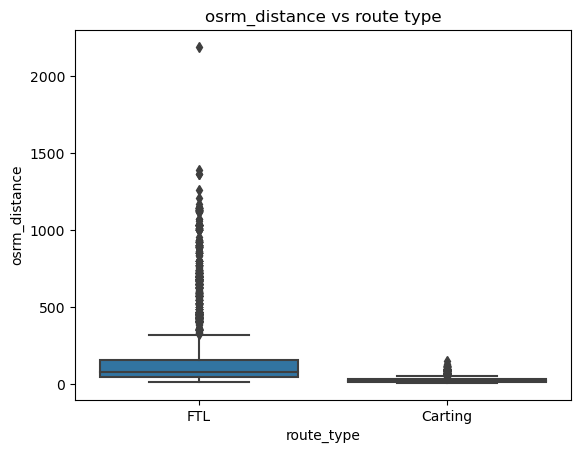

In [155]:
sns.boxplot(data=train_agg, x="route_type", y="osrm_distance")
plt.title("osrm_distance vs route type")
plt.show()

* FLT type route travel for larger distance 

` Is osrm_distance  taken to deliver from source to destination  is same for different route type  `
* h0 :osrm_distance  taken to deliver from source to destination  is same for different route type
* h1 :osrm_distance  taken to deliver from source to destination  is different for different route type
* alpha =0.05

In [156]:
osrm_distance_carting = train_agg[train_agg["route_type"] == "Carting"]["osrm_distance"]
osrm_distance_flt = train_agg[train_agg["route_type"] == "FTL"]["osrm_distance"]

alpha = 0.05
tstats, pval = ttest_ind(osrm_distance_carting, osrm_distance_flt)

if pval < alpha:
    print(
        "reject ho :osrm_distance  taken to deliver from source to destination  is different for different route type"
    )
else:
    print(
        "osrm_distance  taken to deliver from source to destination  is same for different route type"
    )

reject ho :osrm_distance  taken to deliver from source to destination  is different for different route type


` Is osrm_distance covered  is same for different trip_creation_time_dayname ? `
* h0 :osrm_distance covered  is same for different trip_creation_time_dayname
* h1 :osrm_distance covered  is different for different trip_creation_time_dayname
* alpha =0.05

osrm_distance covered  is same for different trip_creation_time_dayname


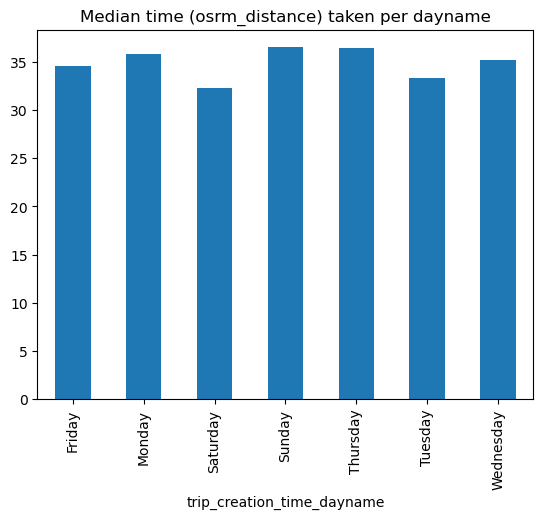

In [157]:
Friday = train_agg[train_agg["trip_creation_time_dayname"] == "Friday"]["osrm_distance"]
Monday = train_agg[train_agg["trip_creation_time_dayname"] == "Monday"]["osrm_distance"]
Saturday = train_agg[train_agg["trip_creation_time_dayname"] == "Saturday"][
    "osrm_distance"
]
Sunday = train_agg[train_agg["trip_creation_time_dayname"] == "Sunday"]["osrm_distance"]
Thursday = train_agg[train_agg["trip_creation_time_dayname"] == "Thursday"][
    "osrm_distance"
]
Tuesday = train_agg[train_agg["trip_creation_time_dayname"] == "Tuesday"][
    "osrm_distance"
]
Wednesday = train_agg[train_agg["trip_creation_time_dayname"] == "Wednesday"][
    "osrm_distance"
]

alpha = 0.05
tstats, pval = f_oneway(Friday, Monday, Saturday, Sunday, Thursday, Tuesday, Wednesday)

if pval < alpha:
    print(
        "reject ho :osrm_distance covered  is different for different trip_creation_time_dayname"
    )
else:
    print("osrm_distance covered  is same for different trip_creation_time_dayname")

train_agg.groupby("trip_creation_time_dayname")["osrm_distance"].median().plot(
    kind="bar"
)
plt.title("Median time (osrm_distance) taken per dayname")
plt.show()

* There is no significant difference in osrm_distance for different day name

` Is osrm_distance covered  is same for different source_name_state_zone ? `
* h0 :osrm_distance covered  is same for different source_name_state_zone
* h1 :osrm_distance covered  is different for different source_name_state_zone
* alpha =0.05

reject ho :osrm_distance covered  is different for different source_name_state_zone


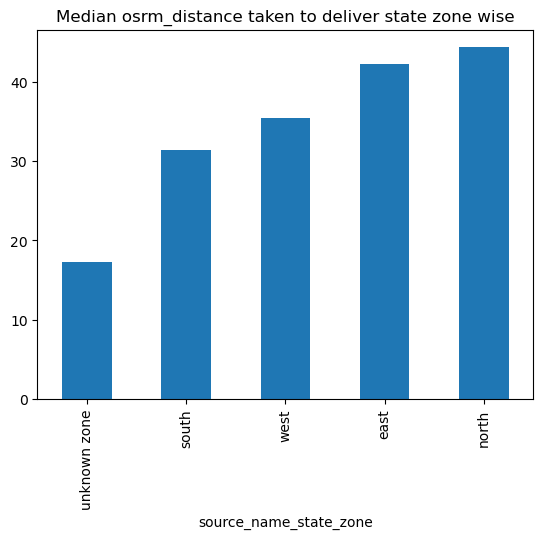

In [158]:
north = train_agg[train_agg["source_name_state_zone"] == "north"]["osrm_distance"]
south = train_agg[train_agg["source_name_state_zone"] == "south"]["osrm_distance"]
east = train_agg[train_agg["source_name_state_zone"] == "east"]["osrm_distance"]
west = train_agg[train_agg["source_name_state_zone"] == "west"]["osrm_distance"]

alpha = 0.05
tstats, pval = f_oneway(north, south, east, west)

if pval < alpha:
    print(
        "reject ho :osrm_distance covered  is different for different source_name_state_zone"
    )
else:
    print("osrm_distance covered  is same for different source_name_state_zone ")

train_agg.groupby("source_name_state_zone")[
    "osrm_distance"
].median().sort_values().plot(kind="bar")
plt.title("Median osrm_distance taken to deliver state zone wise")
plt.show()

* overall osrm_distance covered for north and east zone state are high

* `Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value )`
*  osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time .

` Is osrm_time and actual_time correlated ?`
* h0 :osrm_time and actual_time are  not correlated 
* h1 : osrm_time and actual_time are  correlated 
* alpha =0.05

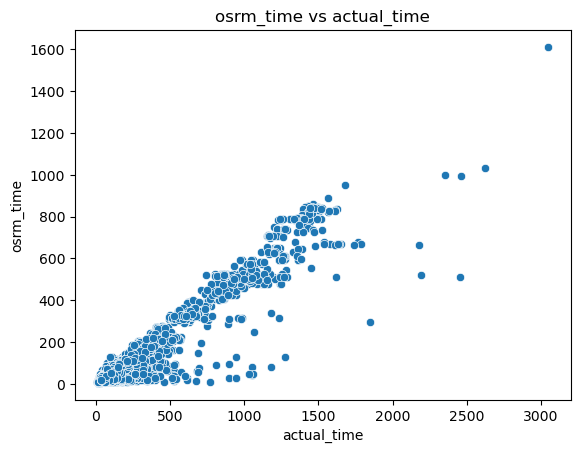

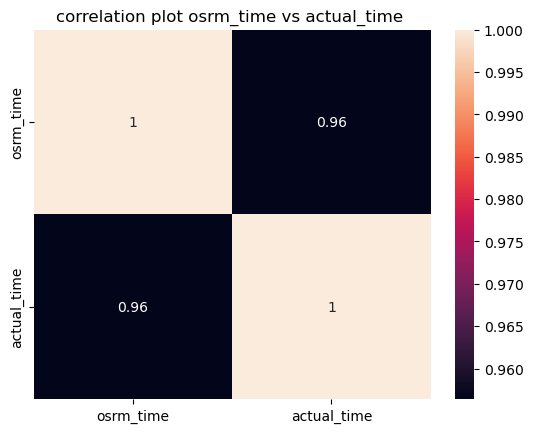

reject ho : osrm_time and actual_time are  correlated 


In [159]:
actual_time = train_agg["actual_time"]
osrm_time = train_agg["osrm_time"]

sns.scatterplot(x=actual_time, y=osrm_time)
plt.title("osrm_time vs actual_time")
plt.show()

sns.heatmap(train_agg[["osrm_time", "actual_time"]].corr(), annot=True)
plt.title("correlation plot osrm_time vs actual_time ")
plt.show()

alpha = 0.05


s, p = stats.pearsonr(actual_time, osrm_time)

if pval < alpha:
    print("reject ho : osrm_time and actual_time are  correlated ")
else:
    print("osrm_time and actual_time are  not correlated ")

` Is Shortest Time taken to deliver from source to destination  is same for different route ?`
* h0 :Shortest Time taken to deliver from source to destination  is same for different route
* h1 :Shortest Time taken to deliver from source to destination  is different for different route
* alpha =0.05

reject ho :Shortest Time taken to deliver from source to destination  is different for different route


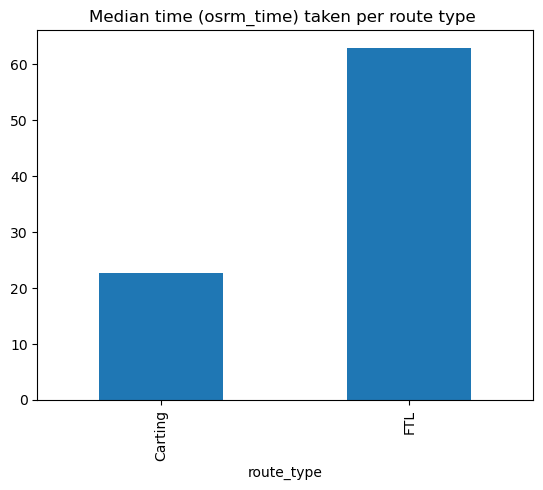

In [160]:
osrm_time_carting = train_agg[train_agg["route_type"] == "Carting"]["osrm_time"]
osrm_time_flt = train_agg[train_agg["route_type"] == "FTL"]["osrm_time"]

alpha = 0.05
tstats, pval = ttest_ind(osrm_time_carting, osrm_time_flt)

if pval < alpha:
    print(
        "reject ho :Shortest Time taken to deliver from source to destination  is different for different route"
    )
else:
    print(
        "Shortest Time taken to deliver from source to destination  is same for different route"
    )


train_agg.groupby("route_type")["osrm_time"].median().plot(kind="bar")
plt.title("Median time (osrm_time) taken per route type ")
plt.show()

` Is Shortest Time taken to deliver from source to destination  is same for different trip_creation_time_dayname ? `
* h0 :Shortest Time taken to deliver from source to destination  is same for different trip_creation_time_dayname
* h1 :Shortest Time taken to deliver from source to destination  is different for different trip_creation_time_dayname
* alpha =0.05

Shortest Time taken to deliver from source to destination  is same for different trip_creation_time_dayname


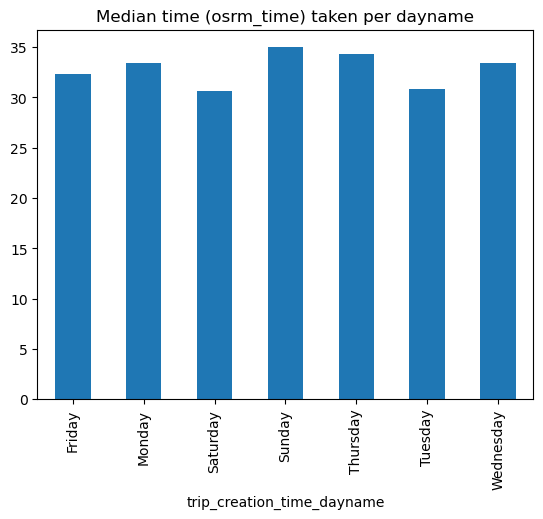

In [161]:
Friday = train_agg[train_agg["trip_creation_time_dayname"] == "Friday"]["osrm_time"]
Monday = train_agg[train_agg["trip_creation_time_dayname"] == "Monday"]["osrm_time"]
Saturday = train_agg[train_agg["trip_creation_time_dayname"] == "Saturday"]["osrm_time"]
Sunday = train_agg[train_agg["trip_creation_time_dayname"] == "Sunday"]["osrm_time"]
Thursday = train_agg[train_agg["trip_creation_time_dayname"] == "Thursday"]["osrm_time"]
Tuesday = train_agg[train_agg["trip_creation_time_dayname"] == "Tuesday"]["osrm_time"]
Wednesday = train_agg[train_agg["trip_creation_time_dayname"] == "Wednesday"][
    "osrm_time"
]

alpha = 0.05
tstats, pval = f_oneway(Friday, Monday, Saturday, Sunday, Thursday, Tuesday, Wednesday)

if pval < alpha:
    print(
        "reject ho :Shortest Time taken to deliver from source to destination  is different for different trip_creation_time_dayname"
    )
else:
    print(
        "Shortest Time taken to deliver from source to destination  is same for different trip_creation_time_dayname"
    )

train_agg.groupby("trip_creation_time_dayname")["osrm_time"].median().plot(kind="bar")
plt.title("Median time (osrm_time) taken per dayname")
plt.show()

` Is Shortest Time taken to deliver from source to destination  is same for different state_zone ? `
* h0 :Shortest Time taken to deliver from source to destination  is same for different state_zone
* h1 :Shortest Time taken to deliver from source to destination  is different for different state_zone
* alpha =0.05

reject ho :Shortest Time taken to deliver from source to destination  is different for different state_zone


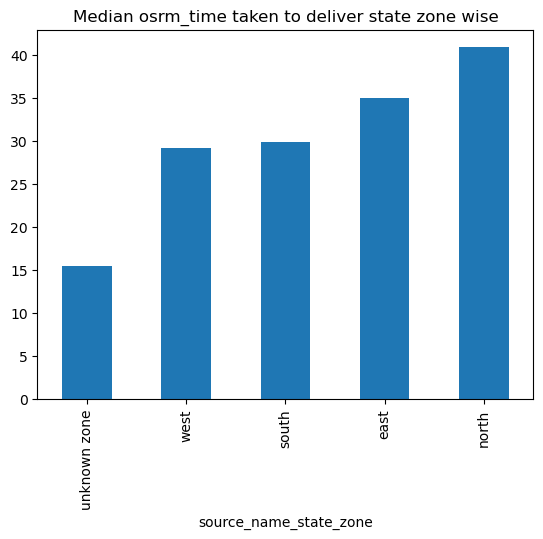

In [162]:
north = train_agg[train_agg["source_name_state_zone"] == "north"]["osrm_time"]
south = train_agg[train_agg["source_name_state_zone"] == "south"]["osrm_time"]
east = train_agg[train_agg["source_name_state_zone"] == "east"]["osrm_time"]
west = train_agg[train_agg["source_name_state_zone"] == "west"]["osrm_time"]

alpha = 0.05
tstats, pval = f_oneway(north, south, east, west)

if pval < alpha:
    print(
        "reject ho :Shortest Time taken to deliver from source to destination  is different for different state_zone"
    )
else:
    print(
        "Shortest Time taken to deliver from source to destination  is same for different state_zone "
    )

train_agg.groupby("source_name_state_zone")["osrm_time"].median().sort_values().plot(
    kind="bar"
)
plt.title("Median osrm_time taken to deliver state zone wise")
plt.show()

* osrm_time time take for different state zone are different
* osrm_time median time taken form west and south are almost same 
* osrm_time median time taken form east and north zone are high north being the highest -- north most of the trip would be of long haulage 


` delta start - end time  analysis `

* h0 :delta Time taken to deliver from source to destination  is same for different state_zone
* h1 :delta Time taken to deliver from source to destination  is different for different state_zone
* alpha =0.05

reject ho :delta Time taken to deliver from source to destination  is different for different state_zone


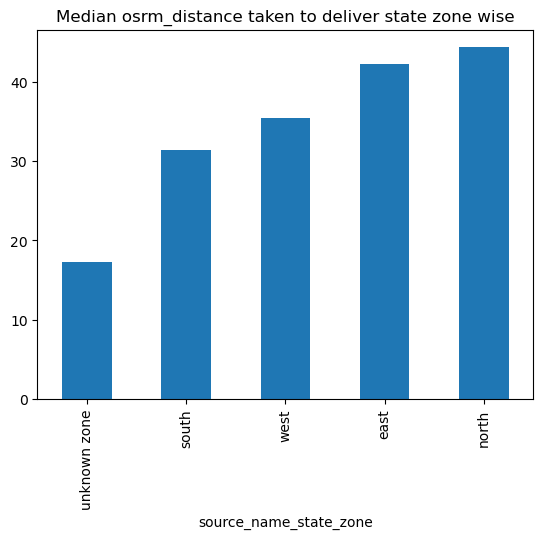

In [163]:


north = train_agg[train_agg["source_name_state_zone"] == "north"]["trip_time_days"]
south = train_agg[train_agg["source_name_state_zone"] == "south"]["trip_time_days"]
east = train_agg[train_agg["source_name_state_zone"] == "east"]["trip_time_days"]
west = train_agg[train_agg["source_name_state_zone"] == "west"]["trip_time_days"]

alpha = 0.05
tstats, pval = f_oneway(north, south, east, west)

if pval < alpha:
    print(
        "reject ho :delta Time taken to deliver from source to destination  is different for different state_zone"
    )
else:
    print("delta Time taken to deliver from source to destination  is same for different state_zone")

train_agg.groupby("source_name_state_zone")[
    "osrm_distance"
].median().sort_values().plot(kind="bar")
plt.title("Median osrm_distance taken to deliver state zone wise")
plt.show()




* it take most time deliver in north and eastern zone  least in southerm zone

# Handle outliers

In [164]:
for col in aggregation_rules[np.mean]:
    print("#" * 50)
    print(f"Treating outlier for col: {col}  in  train set")
    train_agg[col], lower_bound, upper_bound, median = treat_outliers_iqr_pandas(
        train_agg[col], treat="train"
    )
    print(
        f"col: {col}  in  train set parameters : `train_lower_bound : {lower_bound } train_upper_bound : {upper_bound } , train_median  : {median} ` "
    )
    print(f"Imputing test col {col}  based on train parameter ")
    test_agg[col] = treat_outliers_iqr_pandas(
        test_agg[col],
        treat="test",
        lower_bound=lower_bound,
        upper_bound=upper_bound,
        median=median,
    )

##################################################
Treating outlier for col: start_scan_to_end_scan  in  train set
col: start_scan_to_end_scan  in  train set parameters : `train_lower_bound : -251.0 train_upper_bound : 733.0 , train_median  : 195.0 ` 
Imputing test col start_scan_to_end_scan  based on train parameter 
##################################################
Treating outlier for col: actual_distance_to_destination  in  train set
col: actual_distance_to_destination  in  train set parameters : `train_lower_bound : -35.53318473679579 train_upper_bound : 103.45857385955586 , train_median  : 27.0055050547573 ` 
Imputing test col actual_distance_to_destination  based on train parameter 
##################################################
Treating outlier for col: actual_time  in  train set
col: actual_time  in  train set parameters : `train_lower_bound : -82.5839285714286 train_upper_bound : 254.97321428571433 , train_median  : 69.0 ` 
Imputing test col actual_time  based on train p

/var/folders/1_/cxb0dkzn58118b6h8kyydz0r0000gn/T/ipykernel_1029/205074276.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[outliers_mask] = median
/var/folders/1_/cxb0dkzn58118b6h8kyydz0r0000gn/T/ipykernel_1029/205074276.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[outliers_mask] = median
/var/folders/1_/cxb0dkzn58118b6h8kyydz0r0000gn/T/ipykernel_1029/205074276.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[o

# Normalize number

In [165]:
from sklearn.preprocessing import MinMaxScaler

In [166]:
for col in aggregation_rules[np.mean]:
    print("#" * 50)
    scaler = MinMaxScaler()
    print(f"Min max scaling col: {col}  in  train set")
    train_agg[col] = scaler.fit_transform(train_agg[[col]])
    print(f"Min max scaling col: {col}  in  test set")
    test_agg[col] = scaler.transform(test_agg[[col]])

##################################################
Min max scaling col: start_scan_to_end_scan  in  train set
Min max scaling col: start_scan_to_end_scan  in  test set
##################################################
Min max scaling col: actual_distance_to_destination  in  train set
Min max scaling col: actual_distance_to_destination  in  test set
##################################################
Min max scaling col: actual_time  in  train set
Min max scaling col: actual_time  in  test set
##################################################
Min max scaling col: osrm_time  in  train set
Min max scaling col: osrm_time  in  test set
##################################################
Min max scaling col: osrm_distance  in  train set
Min max scaling col: osrm_distance  in  test set
##################################################
Min max scaling col: segment_actual_time  in  train set
Min max scaling col: segment_actual_time  in  test set
################################################

# One hot encoding 

In [173]:
print("One hot encoding train  data ")
df__train_encoded = pd.get_dummies(train_agg, columns=aggregation_rules[calculate_mode].append('source_name_state_zone'),dtype =int)
display(df__train_encoded.head())
display(df__train_encoded.info())
print("One hot encoding test  data ")
df__test_encoded = pd.get_dummies(test_agg, columns=aggregation_rules[calculate_mode].append('source_name_state_zone'),dtype =int)
display(df__test_encoded.head())
display(df__test_encoded.info())

One hot encoding train  data 


,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_time_days,trip_creation_time_year,...,trip_creation_time_dayname_Saturday,trip_creation_time_dayname_Sunday,trip_creation_time_dayname_Thursday,trip_creation_time_dayname_Tuesday,trip_creation_time_dayname_Wednesday,source_name_state_zone_east,source_name_state_zone_north,source_name_state_zone_south,source_name_state_zone_unknown zone,source_name_state_zone_west
0,0.242644,0.191490,0.241023,0.257663,0.211286,0.514948,0.667049,0.693053,0.241872,2018,...,0,0,0,0,1,0,0,0,0,1
1,0.109566,0.188132,0.140257,0.164917,0.171811,0.147744,0.111111,0.113249,0.109889,2018,...,0,0,0,0,1,0,0,1,0,0
2,0.242644,0.191490,0.241023,0.257663,0.211286,0.476375,0.546537,0.568598,0.241872,2018,...,0,0,0,0,1,0,0,1,0,0
3,0.108626,0.055973,0.126639,0.053884,0.055592,0.359170,0.134328,0.127066,0.108524,2018,...,0,0,0,0,1,0,0,0,1,0
4,0.287183,0.267418,0.283626,0.226032,0.238553,0.650655,0.385928,0.388101,0.286685,2018,...,0,0,0,0,1,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10654 entries, 0 to 10653
Columns: 14723 entries, start_scan_to_end_scan to source_name_state_zone_west
dtypes: float64(9), int64(14714)
memory usage: 1.2 GB


None

One hot encoding test  data 


,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_time_days,trip_creation_time_year,...,trip_creation_time_dayname_Saturday,trip_creation_time_dayname_Sunday,trip_creation_time_dayname_Thursday,trip_creation_time_dayname_Tuesday,trip_creation_time_dayname_Wednesday,source_name_state_zone_east,source_name_state_zone_north,source_name_state_zone_south,source_name_state_zone_unknown zone,source_name_state_zone_west
0,0.172108,0.274248,0.173910,0.193842,0.229061,0.183406,0.095949,0.120050,0.172374,2018,...,0,0,1,0,0,0,0,0,0,1
1,0.081822,0.052963,0.114384,0.058782,0.062016,0.351528,0.149254,0.149005,0.081214,2018,...,0,0,1,0,0,0,0,0,1,0
2,0.828094,0.191490,0.241023,0.257663,0.211286,0.359170,0.291045,0.219016,0.827400,2018,...,0,0,1,0,0,0,0,0,0,1
3,0.114268,0.002081,0.069447,0.024493,0.020439,0.320961,0.164179,0.165317,0.114178,2018,...,0,0,1,0,0,0,0,0,0,1
4,0.289198,0.044016,0.494302,0.097971,0.071904,0.909389,0.149254,0.107036,0.289374,2018,...,0,0,1,0,0,0,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4163 entries, 0 to 4162
Columns: 7062 entries, start_scan_to_end_scan to source_name_state_zone_west
dtypes: float64(9), int64(7053)
memory usage: 224.3 MB


None

# Recommendations
* start_scan_to_end_scan is highly corr to [ 'actual_distance_to_destination','actual_time','osrm_time','osrm_distance'] -- `which is good we are delivering packages on almost on time thats why osrm_time and start_scan_to_end_scan  are highly correlated, start_scan_to_end_scan and osrm_distance is correlated because as time incease distance will increase`
* source_name_state Maharastra has most number of shipment created 
* destination state Karnatake has most number of shipment to -- busy state
* source_name_city Gurgaun has most number of shipment created 
* destination city Benguluru has most number of shipment to -- busy city
* busiest (source state and destination state) combination is Karnataka -> Karnataka    and  Maharashtra  -> Maharashtra -- same state
* busiest (source state and destination city) combination is Karnataka -> Bengaluru    and  Maharashtra  -> Mumbai   -- same state 
* most distant (source city -- destination city )  is Chandigarh-> bangalore   --> depot to destination
* most distant (source state -- destination state )  is Punjab-> Karnataka  --> depot to destination
* Time take to deliver is differnt route type ( carting , flt) -- ftl for long route 
* Northern state  take highest time to deliver goods -- poor infra/ logistic -- improve logistic in north-eastern state
* Southern state  take least time to deliver goods  -- strong infra
* States like Andhra,Assam,Bihar,Goa,Jharkhand,Madhya,Orissa,Punjab,Rajasthan prefered mode of transport in FLT -- add more logistic center to improve  delta time

In [5]:
import numpy as np

np.log2(64)

6.0